# Petrophysical Data Visualization

This is a Jupyter Notebook to quickly load, check, process, and visualize geophysical well logs and petrophysical data. 

## About the Data

A dataset with geomechanical parameters, such as Young's modulus, Bulk modulus, Shear modulus, and Poisson's ratio, from 41 wells of the main geothermal reservoirs in the Netherlands is available for download through the _Nederlandse Olie- en Gasportaal_ (NLOG):

https://www.nlog.nl/nieuws/publicatie-van-geomechanische-data-van-de-belangrijkste-geothermische-reservoirs. 

__Reference__: 

[Hunfeld et al., 2021](https://www.nlog.nl/sites/default/files/2021-12/data_selection_and_methods.pdf), _Geomechanical parameters derived from compressional and shear sonic logs for main geothermal targets in The Netherlands_. TNO Notitie. .

## Well Log Data Exploration 

Some examples are given in this notebook. You can adjust things to match your specific project. 

The source data can be stored in LAS and CSV files but other formats can be added if needed. 

There are several predefined graphs to choose from, but new graphs can be added if needed. 

The first step we need to do is import the different modules:

In [1]:
from petrophys.visualization import visualize                                                   # Custom module to generate graphs
from petrophys.data import utils                                                                # Custom module to manipulate data
import lasio                                                                                    # Third party module to read LAS files
import matplotlib.pyplot as plt
import matplotlib as mpl

Next we can read the data we need. Be sure the data is accessible from the notebook. 

Below is the code to read the data

In [2]:
dapgeo2_phase4_VS = lasio.read('../../data/DAPGEO-02/Phase4/DAPGEO-02_500m_PHASE4_VS_processed.las')         # Read lasfile 1
dapgeo2_phase4_IL = lasio.read('../../data/DAPGEO-02/Phase4/DAPGEO-02_500m_PHASE4_IL.las')                   # Read lasfile 2
dapgeo2_phase4_SGR = lasio.read('../../data/DAPGEO-02/Phase4/DAPGEO-02_500m_PHASE4_SGR.las')                 # Read lasfile 3

Next we can extract the data we need and store it in variables:

In [3]:
DEPTH_SGR = dapgeo2_phase4_SGR['DEPT']   
DEPTH_IL = dapgeo2_phase4_IL['DEPT']  
DEPTH_VS = dapgeo2_phase4_VS['DEPT']    
GR = dapgeo2_phase4_VS['GR']
S_WAVE = dapgeo2_phase4_VS['V_S-WAVE_PS']
COND = dapgeo2_phase4_IL['COND']
RES = dapgeo2_phase4_IL['RES']
K = dapgeo2_phase4_SGR['K_SGR']
U = dapgeo2_phase4_SGR['U_SGR']
TH = dapgeo2_phase4_SGR['KTH_SGR']

GRAPH1 = [1.5, 'r', 0, '', 'GR', GR, 'Depth', DEPTH_VS, 0.0, 75.0, False]
GRAPH2 = [1.5, 'y', 0, '', 'V S-wave PS', S_WAVE, '', DEPTH_VS, 1100.0, 1150.0, False]
GRAPH3 = [1.5, 'r', 0, '', 'K', K*5, '', DEPTH_SGR, 0.0, 5.0, True]
GRAPH4 = [1.5, 'g', 0, '', 'U', U, '', DEPTH_SGR, 0.0, 5.0, True]
GRAPH5 = [1.5, 'b', 0, '', 'TH', TH/5, '', DEPTH_SGR, 0.0, 5.0, True]
GRAPH6 = [1.5, 'g', 0, '', 'COND', COND/200, '', DEPTH_IL, 0.0, 7.5, True]
GRAPH7 = [1.5, 'b', 0, '', 'RES', RES, '', DEPTH_IL, 0.0, 7.5, True]

GRAPH = [[GRAPH1], [GRAPH3, GRAPH4, GRAPH5], [GRAPH6, GRAPH7], [GRAPH2]]

The last step is that we use the data and variables to generate graphs

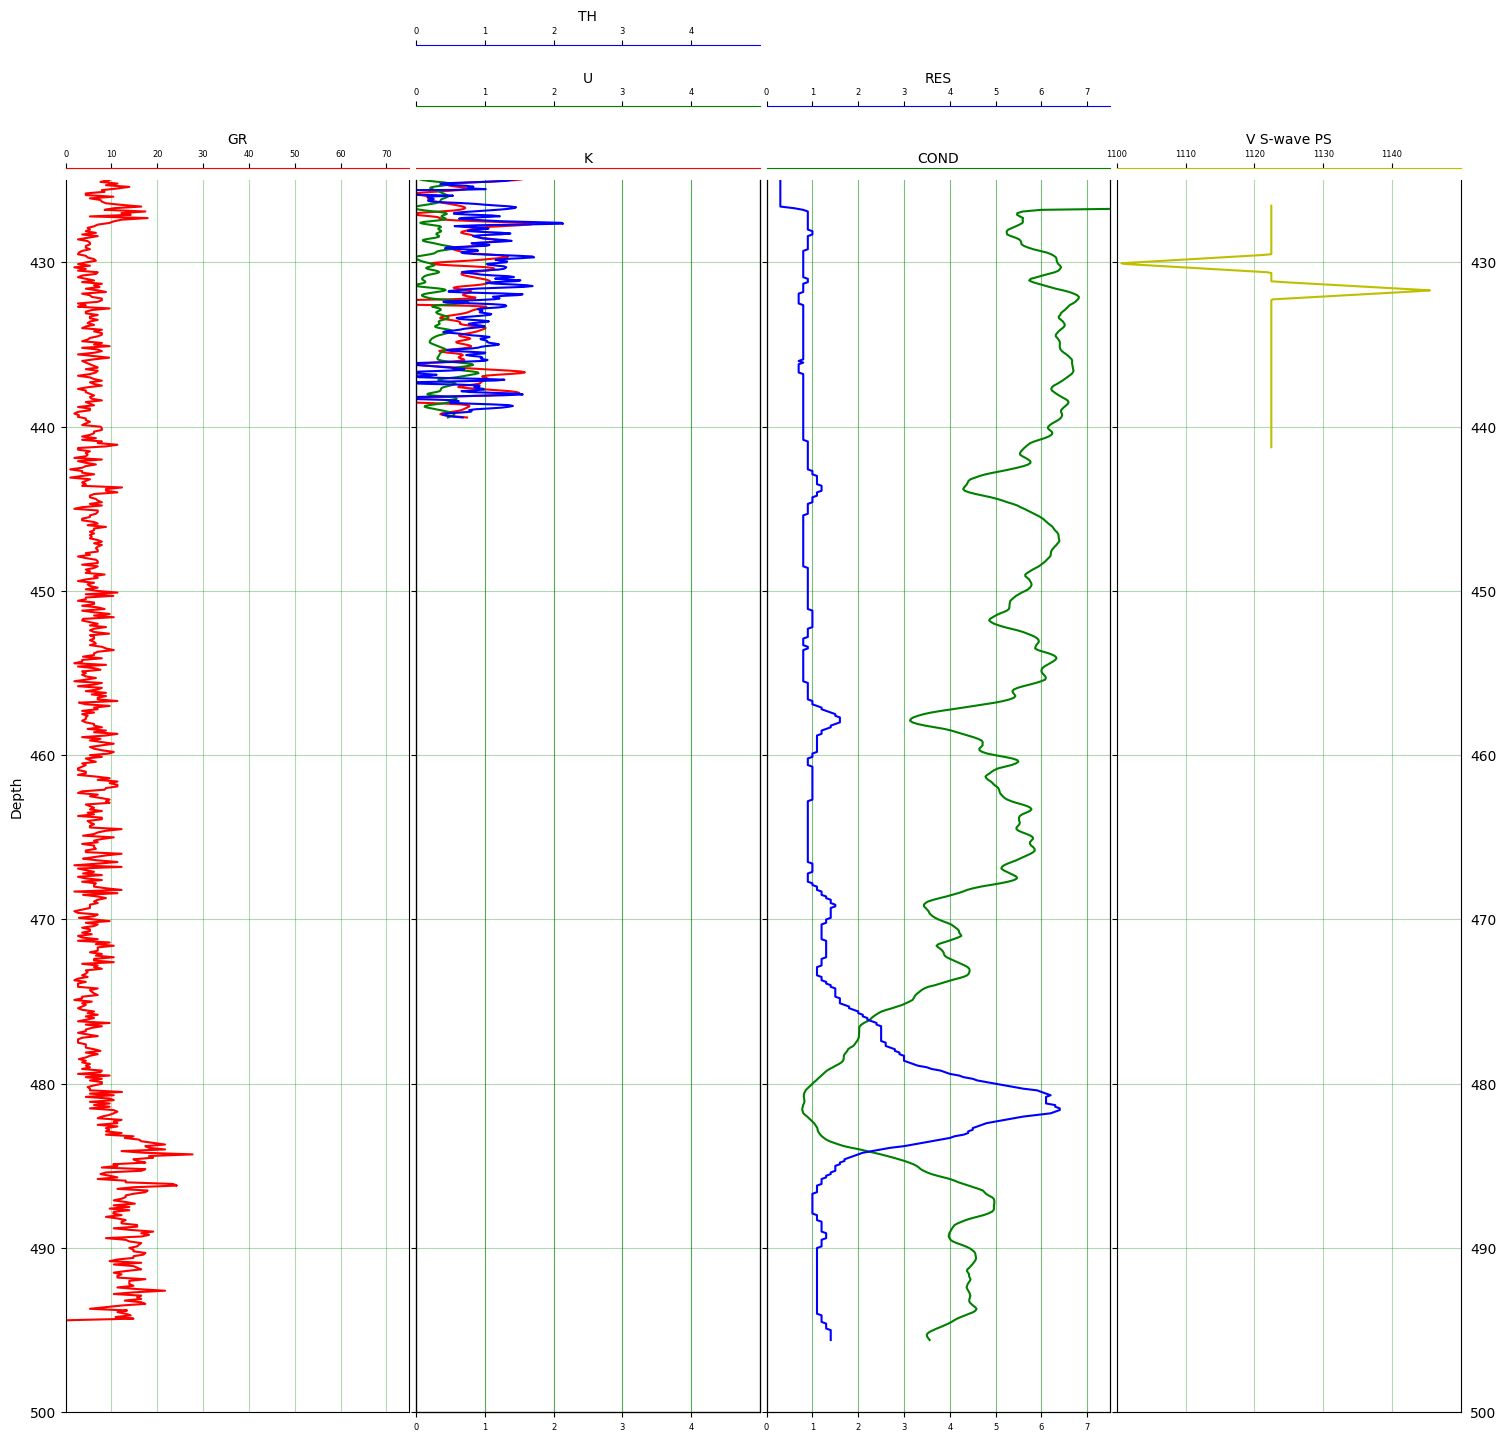

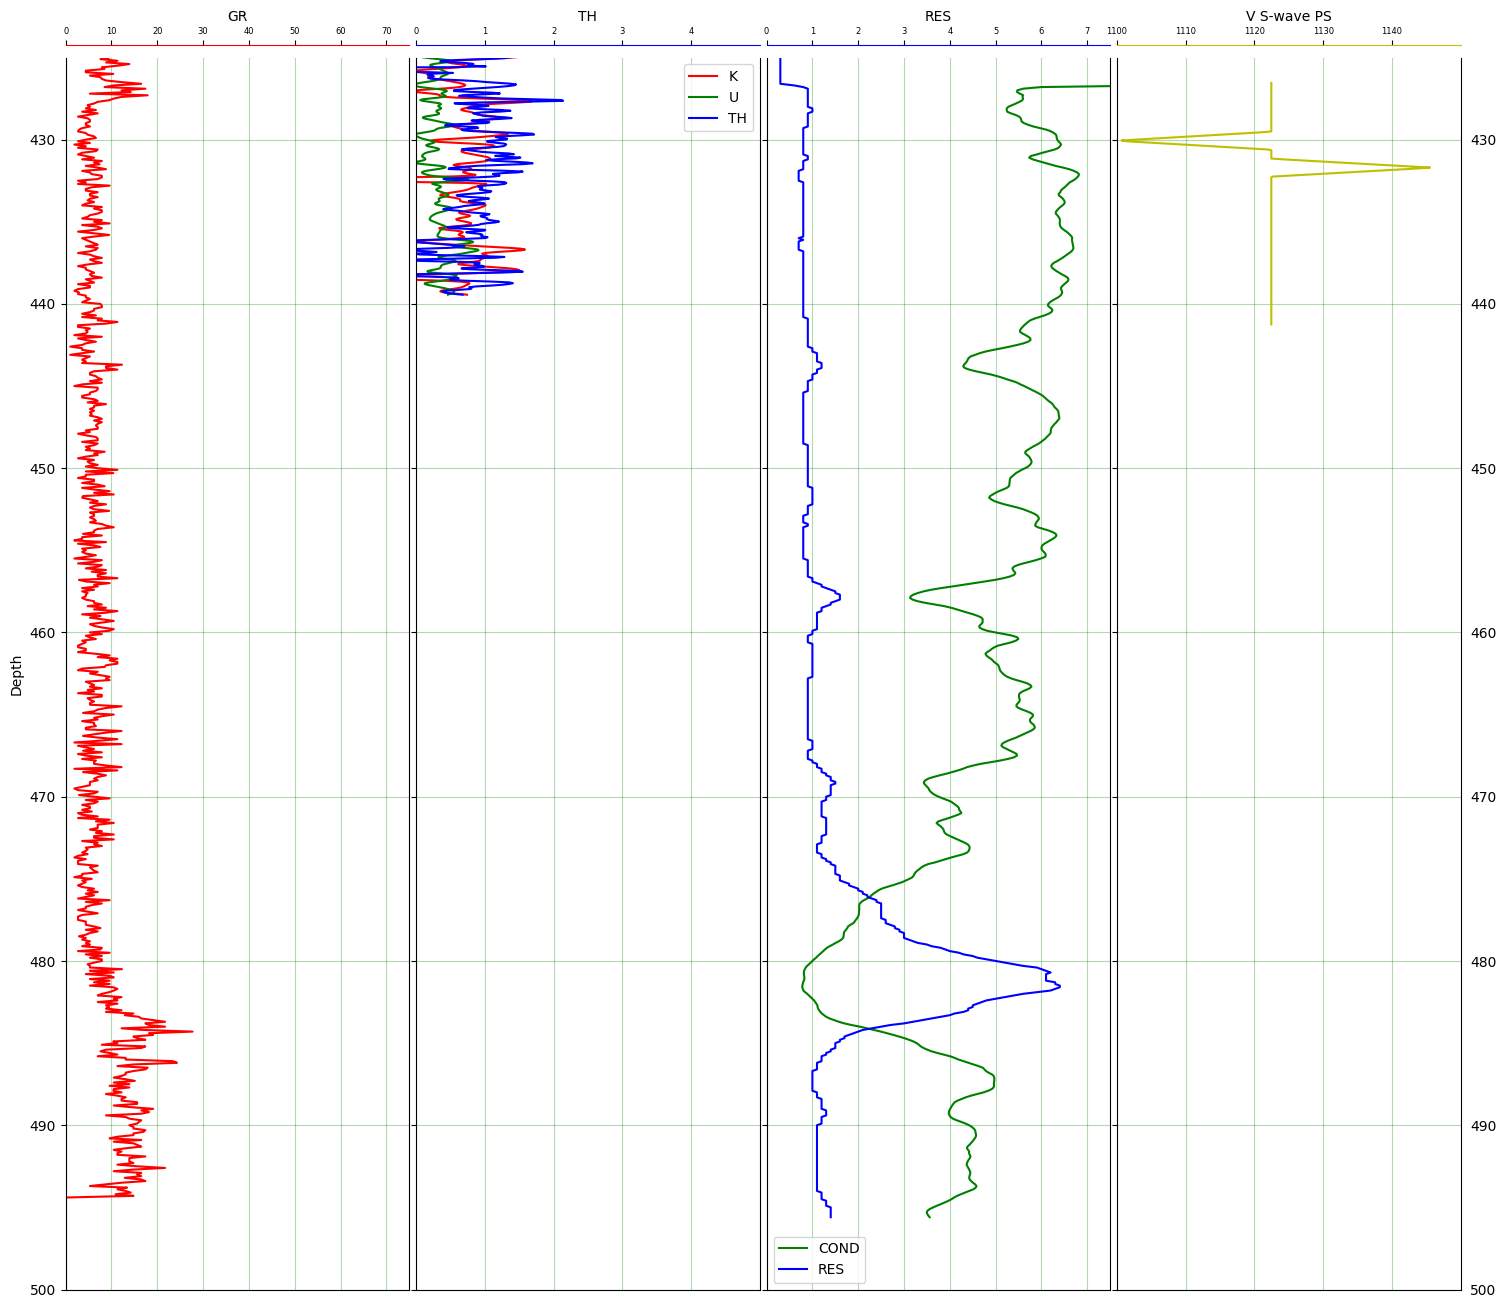

In [4]:
visualize.well_curve2(GRAPH, ylim_high=425.0, ylim_low=500.0)
visualize.well_curve3(GRAPH, ylim_high=425.0, ylim_low=500.0)